In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## This notebook was made too predict sotck prices with traditional machine learning algorithms and deep learning

### To run this notebook ensure that you have already the dataset provided by kaggle -> daily-historical-stock-prices-1970-2018
## if you are running on local machine or google colab skip this part

> ensure that you have the folder : 
1. /kaggle/input/daily-historical-stock-prices-1970-2018/historical_stock_prices.csv
2. /kaggle/input/daily-historical-stock-prices-1970-2018/historical_stocks.csv

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #ploting graphics
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#if your using colab
!unzip drive/My\ Drive/historical_stock_prices.csv.zip 

Archive:  drive/My Drive/historical_stock_prices.csv.zip
  inflating: historical_stock_prices.csv  


Starting by visualizing data;

In [0]:
missing_values = ["n/a", "na", "--"]

#colab
stocks = pd.read_csv('/content/drive/My Drive/historical_stocks.csv',na_values = missing_values)

#kaggle
#stocks = pd.read_csv('/content/drive/My Drive/historical_stocks.csv',na_values = missing_values)

Let's start with a small preview of the corresponding dataframe read previously;

In [5]:
stocks.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [6]:
stocks.columns

Index(['ticker', 'exchange', 'name', 'sector', 'industry'], dtype='object')

In [7]:
stocks.describe()

,ticker,exchange,name,sector,industry
count,6460,6460,6460,5020,5020
unique,6460,2,5462,13,136
top,AMPH,NASDAQ,BANK OF AMERICA CORPORATION,FINANCE,MAJOR PHARMACEUTICALS
freq,1,3308,16,1022,419


We realize there are 5 columns and this dataset:

- 'ticker' corresponds to the name of the share
- 'exchange' corresponds to the type of exchange made 
- 'name' refers the company's name
- 'sector' refers to the actual sector where the given company operates
- 'industry' specifies the type of services that can be provided

We also know that this dataset contains missing values :

> We have missing values on columns 'sector' and 'industry'


In [8]:
stocks.shape

(6460, 5)

In [9]:
stocks['ticker'].unique().size

6460

> We realize there are 6460 entries to the table, where the unique identifiers are the share's names, meaning that a company's name can show up twice if it has, throughout the established period of time, changed the name of it's stocks. We will note that, for having to change the type of exchange, the companies also changed the name of the shares;

> One example of this is:

In [10]:
stocks[stocks['name'] == "1347 PROPERTY INSURANCE HOLDINGS, INC."]

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS


## Missing values treatment

#### The first step is to identify if the companies switched their share name; in the case they did, they can then contain the sector and industry present on another row

> Right now we have the following missing values:

1. ticker         0
2. exchange       0
3. name           0
4. sector      1440
5. industry    1440

> In a 6459 rows × 5 columns matrix


> We want all rows that present null values, so we can obtain the names of the companies that do.

In [11]:
null_data = stocks[stocks.isnull().any(axis=1)]
null_data

,ticker,exchange,name,sector,industry
19,ABP,NASDAQ,ABPRO CORPORATION,NaN,NaN
42,SQZZ,NASDAQ,ACTIVE ALTS CONTRARIAN ETF,NaN,NaN
62,ACT,NASDAQ,ADVISORSHARES VICE ETF,NaN,NaN
100,ABDC,NASDAQ,ALCENTRA CAPITAL CORP.,NaN,NaN
124,SMCP,NASDAQ,ALPHAMARK ACTIVELY MANAGED SMALL CAP ETF,NaN,NaN
...,...,...,...,...,...
6393,WIA,NYSE,WESTERN ASSET/CLAYMORE U.S. TREASURY INFLATION...,NaN,NaN
6431,XFLT,NYSE,XAI OCTAGON FLOATING RATE & ALTERNATIVE INCOME...,NaN,NaN
6451,ZB^A,NYSE,ZIONS BANCORPORATION,NaN,NaN
6452,ZB^G,NYSE,ZIONS BANCORPORATION,NaN,NaN


> We realize that, by standard, all rows that do not have sector, do not have industry either and vice-versa.

### This function checks for companies that changed their ticker name

> If any did, we check if there are some other instances of that same company where the sector and industry information is present.

In [0]:
pd.options.mode.chained_assignment = None
names = null_data['name'].unique()

for companie in names:
    
    data = stocks[stocks['name'] == companie]
    
    for index,row in data.iterrows():
        
        if(not pd.isnull(row['sector'])):
            
            sector = row['sector']
            industry = row['industry']
            
            tmp = stocks[stocks['name'] == row['name']]
            tmp["sector"] = tmp["sector"].fillna(sector)
            tmp['industry'] = tmp['industry'].fillna(industry)
            stocks[stocks['name'] == row['name']] = tmp


In [13]:
stocks.isnull().sum()

ticker         0
exchange       0
name           0
sector      1018
industry    1018
dtype: int64

> After this operation, we remain with a 6459 rows × 5 columns matrix, but we have different numbers of missing values, respectively:

1. ticker         0
2. exchange       0
3. name           0
4. sector      1018
5. industry    1018
6. dtype: int64

### In this part, all remaining missing values will be removed from the dataset, mainly for the reason that there is not sufficient information that allows us to fill these values, given the variety of sector and industries existant.
> We now have a 5442 rows × 5 columns matrix

In [14]:
bad_tickers = stocks[stocks.isnull().any(axis=1)]


stocks = stocks.dropna(how='any',axis=0) 
stocks.isnull().sum()

ticker      0
exchange    0
name        0
sector      0
industry    0
dtype: int64

> Now we only have 5442 tickers

In [15]:
stocks['ticker'].unique().size

5442

# Dataset exploration

> Predominant sectors

> Predominant industries

> Types of stock exchanges on which we operate

In [16]:
stocks['name'].unique().size

4551

In [17]:
stocks['exchange'].value_counts()

NASDAQ    2855
NYSE      2587
Name: exchange, dtype: int64

The number of shares in each type of exchange is rather balanced, which is good for the purpose of ML.
We cannot make any assumptions regarding the distribution of types of exchanges due to the fact that we do not have enough information (right now). There is a chronological order to the types of exchange regarding each company that cannot be verified because there is no time stamp.

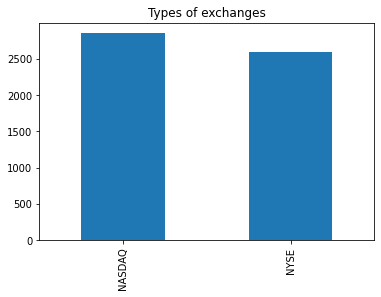

In [18]:
stocks['exchange'].value_counts().plot(kind='bar', title='Types of exchanges')

In [19]:
stocks['sector'].value_counts()

FINANCE                  1222
CONSUMER SERVICES         959
HEALTH CARE               784
TECHNOLOGY                609
CAPITAL GOODS             356
ENERGY                    295
PUBLIC UTILITIES          287
BASIC INDUSTRIES          276
CONSUMER NON-DURABLES     226
CONSUMER DURABLES         147
MISCELLANEOUS             142
TRANSPORTATION            138
SECTOR                      1
Name: sector, dtype: int64

In [20]:
stocks = stocks[stocks['sector'] != 'SECTOR']
stocks.shape
#remover a linha dummy

(5441, 5)

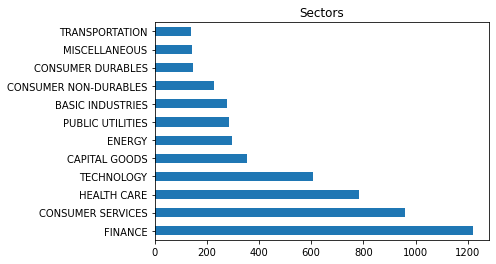

In [21]:
stocks['sector'].value_counts().plot(kind='barh', title='Sectors')

We realize the, throughout the dataset, the Finances sector dominates the sector column, up there with Consumer services and Health care. We can also consider technology, if we allow such leverage.

Text(0, 0.5, '')

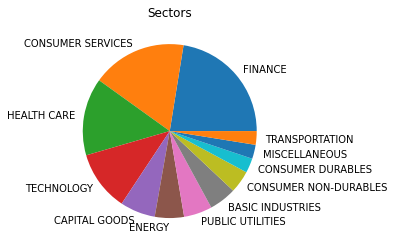

In [22]:
ax=stocks['sector'].value_counts().plot(kind='pie', title='Sectors', )
ax.set_ylabel('')

##  Industry

In [23]:
stocks['industry'].value_counts()

MAJOR BANKS                                        444
MAJOR PHARMACEUTICALS                              419
REAL ESTATE INVESTMENT TRUSTS                      377
BUSINESS SERVICES                                  248
OIL & GAS PRODUCTION                               162
                                                  ... 
GENERAL BLDG CONTRACTORS - NONRESIDENTIAL BLDGS      1
TOBACCO                                              1
CONSUMER: GREETING CARDS                             1
PRECISION INSTRUMENTS                                1
TOOLS/HARDWARE                                       1
Name: industry, Length: 135, dtype: int64

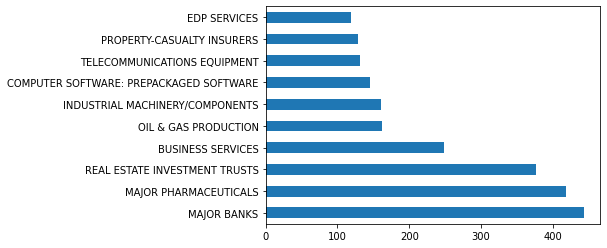

In [24]:
absolute_frequency_top10 = stocks['industry'].value_counts()[:10].copy()
absolute_frequency_top10 = absolute_frequency_top10.rename('')
absolute_frequency_top10.plot(kind='barh')

We can observe two major industries ruling the dataset by a considerable margin: Major Pharmaceuticals and Major Banks.

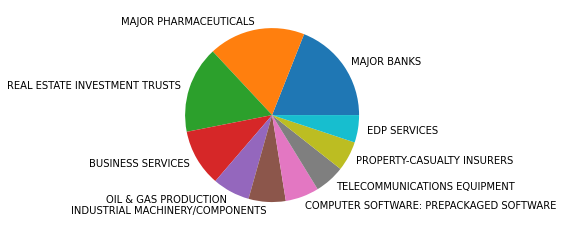

In [25]:
absolute_frequency_top10.plot(kind='pie')

## Let's dive down on the rate of changing in terms of share name.
### As we said earlier, a company with the same name can have several shares names changed through time.

In [0]:
dif_exchange_x_ticker_exchange = stocks.groupby(['name','sector','industry'])['ticker'].agg(ticker_exchange=('ticker','count'), exchange=('exchange','count'))
dif_exchange_x_ticker= stocks.groupby(['name','sector','industry'])['ticker'].agg(ticker_exchange=('ticker','count'))
change_on = dif_exchange_x_ticker[dif_exchange_x_ticker['ticker_exchange'] >=2].sort_values(by='ticker_exchange', ascending=False).apply(lambda x : x-1)
change_off = dif_exchange_x_ticker[dif_exchange_x_ticker['ticker_exchange'] < 2].apply(lambda x : x-1)

In [27]:
dif_exchange_x_ticker_exchange

,,,ticker_exchange,exchange
name,sector,industry,,
"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES,1,1
"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS,2,2
180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES,1,1
1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS,1,1
1ST SOURCE CORPORATION,FINANCE,MAJOR BANKS,1,1
...,...,...,...,...
ZUMIEZ INC.,CONSUMER SERVICES,CLOTHING/SHOE/ACCESSORY STORES,1,1
"ZUORA, INC.",TECHNOLOGY,COMPUTER SOFTWARE: PREPACKAGED SOFTWARE,1,1
ZYMEWORKS INC.,HEALTH CARE,MAJOR PHARMACEUTICALS,1,1


In [28]:
dif_exchange_x_ticker_exchange[dif_exchange_x_ticker_exchange['exchange'] == dif_exchange_x_ticker_exchange['ticker_exchange']].count()

ticker_exchange    4554
exchange           4554
dtype: int64

By the operation above, we see that the number of ticker names and types of exchange are the same, which tells us, by knowing that there are not equal tickers in the dataset, that change to/from either type of exchange requires rebranding of the share, so we can simply identify it by the ticker, like we did priviously. We may also consider that the ticker name might be changed for marketing purposes and maintaining it's type of exchange.

It is worth noting that we will not include the type of exchange as we consider that it doesn't add information: **for now**,we do not have dates of these changes nor the info regarding if the shares still exist or not, so we cannot identify if there's some sort of shitf in favor of any of the types of exchange. So we won't be using type of exchange on the rest of this topic.

In [29]:
change_off

,,,ticker_exchange
name,sector,industry,
"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES,0
180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES,0
1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS,0
1ST SOURCE CORPORATION,FINANCE,MAJOR BANKS,0
"21VIANET GROUP, INC.",TECHNOLOGY,"COMPUTER SOFTWARE: PROGRAMMING, DATA PROCESSING",0
...,...,...,...
ZUMIEZ INC.,CONSUMER SERVICES,CLOTHING/SHOE/ACCESSORY STORES,0
"ZUORA, INC.",TECHNOLOGY,COMPUTER SOFTWARE: PREPACKAGED SOFTWARE,0
ZYMEWORKS INC.,HEALTH CARE,MAJOR PHARMACEUTICALS,0


In [30]:
change_on

,,,ticker_exchange
name,sector,industry,
BANK OF AMERICA CORPORATION,FINANCE,MAJOR BANKS,15
WELLS FARGO & COMPANY,FINANCE,MAJOR BANKS,14
PUBLIC STORAGE,CONSUMER SERVICES,REAL ESTATE INVESTMENT TRUSTS,13
BARCLAYS PLC,FINANCE,COMMERCIAL BANKS,12
CREDIT SUISSE AG,FINANCE,INVESTMENT BANKERS/BROKERS/SERVICE,11
...,...,...,...
BANK OF NEW YORK MELLON CORPORATION (THE),FINANCE,MAJOR BANKS,1
HOVNANIAN ENTERPRISES INC,CAPITAL GOODS,HOMEBUILDING,1
"HOSTESS BRANDS, INC.",CONSUMER NON-DURABLES,PACKAGED FOODS,1


We produced two distinct dataframes, grouped by the companies' names, sectors and industries,respectively, and contemplate the number of changes on ticker:
> The first one regards to the companies that did not make any changes, going by the name 'change_off'

> The second one regards to the companies that made name changes in the past, going by the name 'change_on'


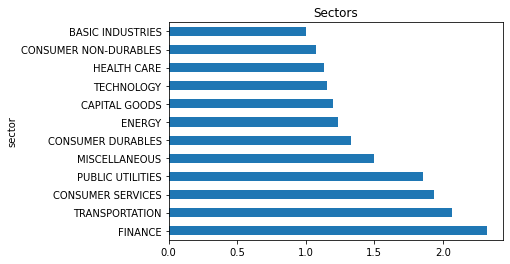

In [31]:
ax=change_on.groupby('sector').mean().sort_values(by='ticker_exchange',ascending=False).plot(kind='barh',y='ticker_exchange',legend=False, title ='Sectors')
#ax.set_ylabel('')

We identify that companies on the Finances sector show a mean higher regarding the rebranding of their tickers, followed closely by Transportation and Consumer Services

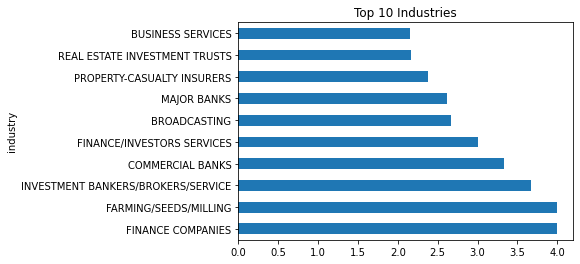

In [32]:
ax=change_on.groupby('industry').mean().sort_values(by='ticker_exchange',ascending=False)[:10].plot(kind='barh',y='ticker_exchange',legend=False, title ='Top 10 Industries')
#ax.set_ylabel('')

Industry wise, we can see that Finances show up big again, equal with Farming/Seeds/Milling. Investment Bankers/Brokers/Service follow right away.

We conclude the the shallow analysis of the first component of the Stock Prices dataset.

# Let's now explore the stock prices

In [33]:
stock_prices = pd.read_csv('/content/historical_stock_prices.csv')
stock_prices

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14
...,...,...,...,...,...,...,...,...
20973884,NZF,14.60,14.59,14.590000,14.58,14.62,137500,2018-08-20
20973885,NZF,14.60,14.58,14.580000,14.57,14.61,151200,2018-08-21
20973886,NZF,14.58,14.59,14.590000,14.57,14.63,185400,2018-08-22
20973887,NZF,14.60,14.57,14.570000,14.57,14.64,135600,2018-08-23


Short explanation about the dataset

- 'ticker' corresponds to the name of the share
- 'open' describe the open price of that share in a specific day
- 'close' describe the final share price in the end of a day
- 'adj-close' it´s a tricky column, describes the ajudsted price of a share, thats normally different from the close price
 > An example of this, is when a stock splits occur. 
A stock split it's a current way used for compannies to sell more stocks, by diving the price in (x), lets say x = 2, then if one share = 10€, then, when stock split occurs, let say with a split=2, the share is equal to 5€, but in the end this 2 shares represent the same as 1 share, e.g, imagine that the companny have 10 shares, if you buy 1 share you have 1% of the company, in a stock split(split=2), if you buy 2 shares you only have 1% of the comapnny two.

 > A stock's price is typically affected by supply and demand of market participants. However, some corporate actions, such as stock splits, dividends / distributions and rights offerings can affect a stock's price and adjustments are needed to arrive at a technically accurate reflection of the true value of that stock.

- 'low' is the lowest value paid for that share
- 'high' is the highest value paid for that share
- 'volume' of shares purchased in that day
- 'date' represents the date (year-month-day)

> As we can notice by the table above, this dataset doesn't contain any missing value

> We can also conclude that the open-close and low-hight columns have there values very close.

> This is a common scenario in the market, the stock prices only differ a few cents.

In [34]:
stock_prices.describe()

,open,close,adj_close,low,high,volume
count,2.097389e+07,2.097389e+07,2.097389e+07,2.097389e+07,2.097389e+07,2.097389e+07
mean,7.605823e+01,7.611403e+01,1.481184e+14,7.422064e+01,7.803857e+01,1.227043e+06
std,2.849639e+03,2.870159e+03,4.574674e+16,2.746059e+03,2.997937e+03,1.316686e+07
min,4.000000e-04,2.000000e-04,2.282650e-09,1.000000e-04,4.000000e-04,1.000000e+00
25%,7.500000e+00,7.500000e+00,4.620000e+00,7.360000e+00,7.630000e+00,2.210000e+04
50%,1.545000e+01,1.545000e+01,1.138199e+01,1.524000e+01,1.566000e+01,1.260000e+05
75%,2.972000e+01,2.972000e+01,2.472046e+01,2.928000e+01,3.010000e+01,6.074000e+05
max,2.034000e+06,1.779750e+06,1.894962e+19,1.440000e+06,2.070000e+06,4.483504e+09


# Correlation analysis

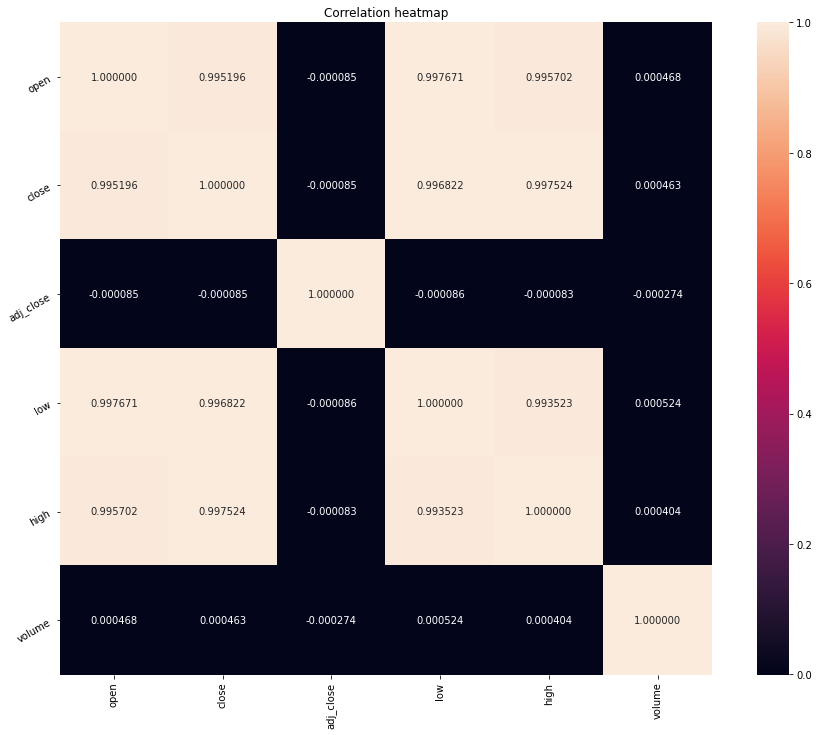

In [35]:
correlation = stock_prices.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.6f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

>As we can expect,due to the nature of the concept of adjusted closing price, the adj_close feature isn't very corrolated with any other.

>With this task, we intend to predict the values of the adjusted closing price for some company, based on historical records and price variatons. Note that we are limited buy the detail and information provided from this dataset, as we are aware that there is a lot more to know about stock prices. Many factors could be embeded in this case but we chose not to due to the vast amount of possibilites. We also consider this dataset rich enough to provide good results regarding prediction.

## Let's check the rate of volumes and the mean,variance and standart deviation of the ajd_close price

### As we can notice, the ajudsted close price is the key to a good trader. We want to build serveral machine learning algorithms that can accurately predict this column.

In [0]:
stock_adj_mean = stock_prices.groupby(['ticker'])['volume'].agg(Volume_of_trades=('Volume','sum'), Count_Ticker=('ticker','count'),Mean_adj_close =('adj_close', 'mean'))
stock_adj_var = stock_prices.groupby(['ticker'])['volume'].agg(Var_adj_close =('adj_close', 'var'))
stock_adj_std = stock_prices.groupby(['ticker'])['volume'].agg(Std_adj_close =('adj_close', 'std'))


stocks_adj_close = stock_adj_mean.join(stock_adj_var, how = 'left', lsuffix = 'ticker').join(stock_adj_std, how = 'left', lsuffix = 'ticker')

In [37]:
stocks_adj_close

,Volume_of_trades,Count_Ticker,Mean_adj_close,Var_adj_close,Std_adj_close
ticker,,,,,
A,18000650300,4722,3.812082e+06,6.380635e+12,2.525992e+06
AA,36347414100,12273,2.961575e+06,2.092626e+13,4.574523e+06
AABA,128688111700,5632,2.284945e+07,4.443794e+14,2.108031e+07
AAC,26540200,155,1.712271e+05,2.339867e+10,1.529662e+05
AAL,24310877700,3251,7.477969e+06,3.614027e+13,6.011678e+06
...,...,...,...,...,...
ZTS,5072412900,1402,3.617984e+06,1.104259e+13,3.323039e+06
ZUMZ,1521606500,3350,4.542109e+05,1.989288e+11,4.460143e+05
ZUO,111821500,95,1.177068e+06,2.120118e+12,1.456063e+06


## As we can see by the table, some companies appear more than others.
### We will try to predict the adjusted close price for the companies that have more tickets/rows on the dataset, meaning we are choosing the companies with more data, for more potentially accurate predictions

In [38]:
stocks_adj_close.describe()

,Volume_of_trades,Count_Ticker,Mean_adj_close,Var_adj_close,Std_adj_close
count,5.685000e+03,5685.000000,5.685000e+03,5.684000e+03,5.684000e+03
mean,4.526977e+09,3689.338434,9.140485e+05,1.014622e+14,1.098775e+06
std,3.468412e+10,2973.716495,9.430167e+06,6.870001e+15,1.001362e+07
min,6.000000e+02,1.000000,2.000000e+02,0.000000e+00,0.000000e+00
25%,8.620490e+07,1104.000000,4.679925e+04,6.366286e+09,7.978900e+04
50%,3.941124e+08,2978.000000,1.739812e+05,9.008156e+10,3.001359e+05
75%,1.807450e+09,5735.000000,5.696173e+05,7.144775e+11,8.452677e+05
max,2.037690e+12,12274.000000,6.771986e+08,5.178087e+17,7.195893e+08


In [39]:
stocks_adj_close_top_10 = stocks_adj_close['Count_Ticker'].sort_values(ascending = False)[:10].copy()
stocks_adj_close_top_10 = stocks_adj_close_top_10.rename('')
stocks_adj_close_top_10

ticker
HPQ     12274
BA      12274
IP      12274
CAT     12274
AEP     12274
NAV     12274
DIS     12274
ARNC    12274
JNJ     12274
FL      12274
Name: , dtype: int64

## We want to predict the stock prices to a specific company.
### So the first step it's to make a dataframe with a unique ticker.

# Let's start by making an algorithm to predict the ajudsted close price of the HPQ

In [57]:
def companny_stocks(ticker):
    return stock_prices[stock_prices["ticker"] == ticker]

df = companny_stocks("HPQ")
df = df.drop(["ticker"],axis=1)
df[60:80]

,open,close,adj_close,low,high,volume,date
14222912,0.313103,0.313990,0.018849,0.310442,0.313990,1282400,1970-03-31
14222913,0.313990,0.321973,0.019329,0.313103,0.321973,2578900,1970-04-01
14222914,0.321973,0.320199,0.019222,0.317538,0.325521,12218400,1970-04-02
14222915,0.320199,0.318425,0.019116,0.315764,0.320199,3833200,1970-04-03
14222925,0.318425,0.297138,0.017838,0.295364,0.318425,6031700,1970-04-06
14222926,0.297138,0.290929,0.017465,0.285607,0.298025,3311800,1970-04-07
14222927,0.290929,0.297138,0.017838,0.290929,0.298912,2381600,1970-04-08
14222928,0.297138,0.297138,0.017838,0.295364,0.300685,3339900,1970-04-09
14222941,0.297138,0.304233,0.018264,0.296251,0.305120,1916600,1970-04-10
14222951,0.304233,0.303346,0.018210,0.303346,0.305120,930100,1970-04-13


> As we can see by the image, we can't conclude that the days with more volumes are related to the difference between then open and close price of this stock compannie, as we said early, this is a very variated problem, we can't find any dependencies here that can help us to "make" new features more correlated to the adj_close.

In [58]:
df.sort_values(by = 'volume', ascending = False)[0:10]

,open,close,adj_close,low,high,volume,date
14311291,19.741144,19.346048,13.910851,19.268847,19.909174,442012300,2010-08-09
14317660,5.286104,5.317893,4.153480,5.154405,5.476839,340591200,2012-11-20
14305336,20.158947,20.104450,13.913208,19.650318,20.821980,312113000,2008-05-13
14317267,7.824705,6.771117,5.288505,6.743869,7.879201,310536600,2012-10-03
14318305,8.269754,8.719346,6.955170,8.224341,9.005449,293423300,2013-02-22
14314059,10.717529,10.717529,7.866162,10.331517,10.903724,283937900,2011-08-19
14296714,10.036330,9.777475,6.320040,9.545867,10.108992,224995900,2005-02-09
14313319,17.061762,16.762035,12.210326,16.366940,17.102634,221134000,2011-05-17
14312741,19.836512,19.795641,14.359287,19.332424,19.854677,212846600,2011-02-23
14314057,13.560400,13.401453,9.836040,13.006358,15.440509,211412900,2011-08-18


> Data corresponding to the company with the HPQ ticker

> All rows are ordered by date, we can see that there are some hops, for example from 1970-04-24 to 1970-04-27, as we can see in the last two rows of this dataset, but these hops are derived from the wekends, where the trading market is closed and sometimes holidays.

In [59]:
df = df.drop(["date"],axis=1)
df.describe()

,open,close,adj_close,low,high,volume
count,12274.000000,12274.000000,12274.000000,12274.000000,12274.000000,1.227400e+04
mean,8.056883,8.063258,4.899850,7.949466,8.174336,1.678352e+07
std,7.510812,7.517546,5.869501,7.407970,7.622849,1.806805e+07
min,0.140142,0.137482,0.008253,0.137482,0.141916,1.510000e+04
25%,1.284344,1.287892,0.090425,1.270152,1.302083,5.971800e+06
50%,4.672599,4.669051,1.210172,4.605188,4.718721,1.180180e+07
75%,13.836853,13.836853,8.975129,13.627384,14.039310,2.208455e+07
max,34.826294,35.422344,24.629999,33.293598,35.422344,4.420123e+08


### This companie have the NYSE Exhange and is Sector is Technology

In [60]:
stocks[stocks['ticker'] == 'HPQ']

,ticker,exchange,name,sector,industry
4757,HPQ,NYSE,HP INC.,TECHNOLOGY,COMPUTER MANUFACTURING


## Importante
## Acrescentamos uma nova feature, a feature que queremos prever

> Dado a variação de stock prices, em vez de se tentar prever o closed ou adj_close price, decide-se interpretra o problema de outra forma. 

> Criamos uma nova feature, respetivamente **variation_info**, que representa a variação, positiva ou negativa do closed price entre o respetivo dia e o dia seguinte.

> Ou seja o nosso modelo vai tentar detetar qual o tipo de variação que irá ocorrer o melhor possível, ou seja, se os stocks prices vão descer ou subir, e para além disso vai tentar prever qual a variação numérica correspondente.

> Desta forma, mesmo que os resultados não sejam muito precisos conseguimos ter uma noção do que vai acontecer ao preço, respetivamente se vai descer ou subir.

> Função que cria adiciona a nova feature para uma determinada empresa correspondente à variação entre closed prices do dia atual e do dia seguinte.

In [0]:
#Last row have 0 in variation, cause we dont have the next row, should we remove it?

#Mudar frase
#Variação é entre o atual e o de amanhã, para qd fizermos a previsão termos o modelo a inferir cenas corretas

def make_variation_info_for_company(df):

  variation_info = []
  variation_info.append(0)
  tmp = 0

  for index,row in df.iterrows():
  
    if(tmp == 0):
        close_price = row[1]
        tmp+=1
    
    else:
      variation = row[1] - close_price
      close_price = row[1]
      variation_info.append(variation)
  
  df.insert(2, "Variation_info", variation_info, True)

make_variation_info_for_company(df)

In [62]:
df.head()

,open,close,Variation_info,adj_close,low,high,volume
14222797,0.365435,0.363217,0.000000,0.021705,0.361443,0.365435,1324700
14222798,0.363661,0.373861,0.010644,0.022341,0.363661,0.375192,4368700
14222799,0.373861,0.369870,-0.003991,0.022103,0.369870,0.374305,2395700
14222800,0.370313,0.370757,0.000887,0.022156,0.370313,0.372087,1014600
14222801,0.370757,0.374305,0.003548,0.022368,0.370313,0.379183,3325900


In [63]:
df.describe()

,open,close,Variation_info,adj_close,low,high,volume
count,12274.000000,12274.000000,12274.000000,12274.000000,12274.000000,12274.000000,1.227400e+04
mean,8.056883,8.063258,0.001938,4.899850,7.949466,8.174336,1.678352e+07
std,7.510812,7.517546,0.265847,5.869501,7.407970,7.622849,1.806805e+07
min,0.140142,0.137482,-4.952883,0.008253,0.137482,0.141916,1.510000e+04
25%,1.284344,1.287892,-0.042575,0.090425,1.270152,1.302083,5.971800e+06
50%,4.672599,4.669051,0.000000,1.210172,4.605188,4.718721,1.180180e+07
75%,13.836853,13.836853,0.049954,8.975129,13.627384,14.039310,2.208455e+07
max,34.826294,35.422344,3.193121,24.629999,33.293598,35.422344,4.420123e+08


# Machine Learning algorithms

1. Linear Regression
2. Support Vectors Classifers for Regression SVR
3. Decisions Tree / Random Forest
4. Recurrent Neural Networks (RNN) / LSTM



> First lets prepare the small dataset corresponding to the comapny HPQ:

> The adj_close price column it's the label column and the rest of the features are independent variables

> Lets normalize all the variables, and then make a x_train and y_train


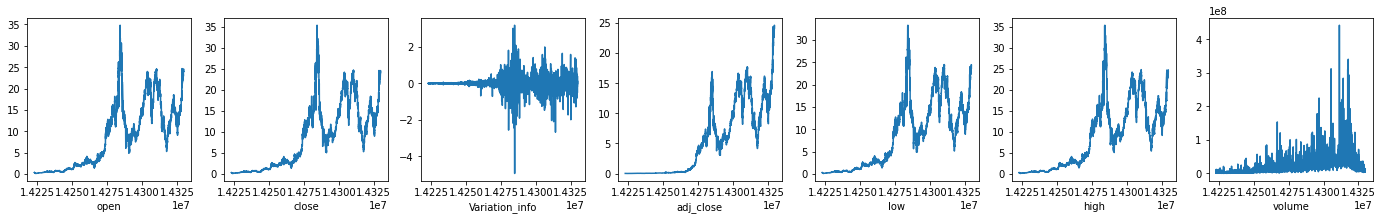

In [64]:
def show_distribution(df):
    plt.figure(figsize=(70, 3))
    i = 0
    
    for feature in df:
        plt.subplot(1, 20, i+1)
        plt.plot(df[feature])
        plt.xlabel(feature)
        i += 1
    plt.show()

show_distribution(df)

>As we can see, all these distributions are very similar, but none of them is close to a normal distribution, so we will normalize the data using the min-max normalizer.

# Normalizing and splitting the data

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = df.iloc[:,[0,1,3,4,5,6]]
y = df.iloc[:,[2]].to_numpy()
x = scaler.fit_transform(x)

# Spliting the data

## Should we use Time Series Split?
## For now im justing using 10% of the final data to represent the test set and another 10% for validation purposes

In [66]:
#10% equivale 1227

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
      x, y, test_size=0.2, random_state=42,shuffle=False)

x_test, x_val, y_test, y_val = train_test_split(
      x_test, y_test, test_size=0.5, random_state=42,shuffle=False)


print(" --------- Info about the datasets shape --------- ")
print("Train set have a shape of " + str(x_train.shape))
print("Train label have a shape of " + str(y_train.shape))
print("\n")
print("Val set have a shape of " + str(x_val.shape))
print("Val label have a shape of " + str(y_val.shape))
print("\n")
print("Test set have a shape of " + str(x_test.shape))
print("Test label have a shape of " + str(y_test.shape))

 --------- Info about the datasets shape --------- 
Train set have a shape of (9819, 6)
Train label have a shape of (9819, 1)


Val set have a shape of (1228, 6)
Val label have a shape of (1228, 1)


Test set have a shape of (1227, 6)
Test label have a shape of (1227, 1)


In [67]:
print("Info about the values on y train :")
print(pd.DataFrame(y_train).describe())

print("\n")

print("Info about the values on y val :")
print(pd.DataFrame(y_val).describe())

print("\n")

print("As we can see by this columns the test as a lower mean that the training set")
print("Info about the values on y test :")
print(pd.DataFrame(y_test).describe())

print("\n")

Info about the values on y train :
                 0
count  9819.000000
mean      0.001565
std       0.258383
min      -4.952883
25%      -0.028383
50%       0.000000
75%       0.035479
max       3.193121


Info about the values on y val :
                 0
count  1228.000000
mean      0.011308
std       0.271627
min      -2.000000
25%      -0.118074
50%       0.010000
75%       0.145323
max       1.586585


As we can see by this columns the test as a lower mean that the training set
Info about the values on y test :
                 0
count  1227.000000
mean     -0.004456
std       0.314461
min      -2.683924
25%      -0.145322
50%       0.004541
75%       0.168028
max       1.648501




# Linear Regression

> Best so far:

    Train RMSE: 0.11181508720815861
    
    Validation RMSE: 0.08294200344270668

    Test RMSE: 0.18634031732139042

> With fit_intercept = True and normalize = False

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

We start off with a simples linear regression;
This implementation uses a 5 fold cross validation on a single model;
We consider linear regression as an introduction to the problem because we believe it might not perform as well as we'd like, so the effort put in this algorithm will be reduced in comparison with others.

In [71]:
x_train[0]

array([0.00649517, 0.00639753, 0.00054635, 0.00675477, 0.00633548,
       0.00296291])

In [72]:
from sklearn.metrics import mean_squared_error

#We already have the x_train normalized
regression_linear_model = LinearRegression(normalize = True)

scores = cross_validate(regression_linear_model, x_train, y_train, cv=5,
                        scoring=('neg_root_mean_squared_error'),
                        return_train_score=True,return_estimator=True)

train_rmse = (scores['train_score']*-1).mean()
val_rmse = (scores['test_score']*-1).mean()


print('Train RMSE: {}'.format(train_rmse))
print('Validation RMSE: {}'.format(val_rmse))

regr_model = scores['estimator'][0]

y_pred = regr_model.predict(x_test)

test_rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Test RMSE: {}'.format(test_rmse))

Train RMSE: 0.11181508720815861
Validation RMSE: 0.08294200344270668
Test RMSE: 0.18634031732139042


In [73]:
coefs = regression_linear_model.fit(x_train, y_train).coef_[0]
print("This are the estimated coefficients for the regression model: \n")
print(coefs)

This are the estimated coefficients for the regression model: 

[-3.75446781e+01  3.69803361e+01 -1.35865250e-01  2.44950627e+00
 -1.23488826e+00 -2.59405128e-02]


By analyzing the values of the root mean squared error metric, we realize the model is having a troubles in is performance. We consider there is overfitting and that RMSE close to 0.31 can't be quite useful in the task. We also know that SGD regressor, Ridge and Lasso models could potentially yield better results, if brought up together with some hyperparameter tunning.

>comparison result as a bar graph using the below script

>**Note**: As the number of records is huge, for representation purpose we use just 30 records.

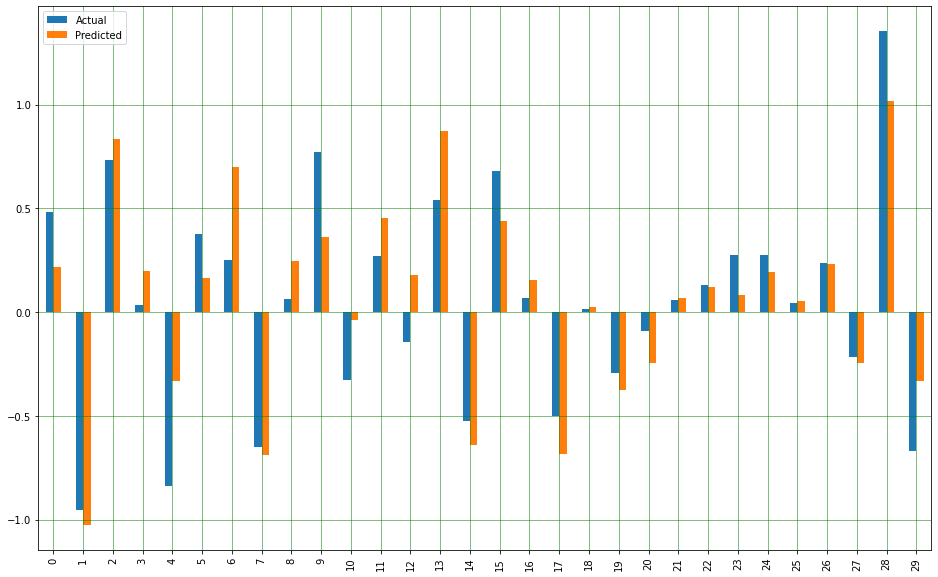

In [74]:
result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

result1 = result.head(30)
result1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

On a superficial view, we can still consider it's performance acceptable. Although, we demand some better and more accurate results. 
We will follow it up with SVMs. 

For the SVMs, we chose some parameters that could be used on hypertunning. We do realize that there are move parameters to be tunned (such as gamma for the specified kernel), but due to time and hardware limitations, we comprised them into a list of the more relevant ones for the task.

> Best so far: 

    Train RMSE: 1.7043357622582236
    
    Validation RMSE: 1.713339053064854
    
    Test RMSE: 1.6827817262354443

In [0]:
param_grid = {
    'kernel' : ['linear','poly','rbf'],
    'C' : [0.01, 0.1, 1, 10],
    'epsilon' : [0.001, 0.01, 0.1, 1, 10]
}

In [0]:
svm_model = SVR()
clf = GridSearchCV(svm_model, param_grid,cv=5,return_train_score=True,scoring='neg_root_mean_squared_error',refit=True)
scores_svm = clf.fit(x_train, y_train.ravel())

> Plotted erros for every different configuration of SVR

In [0]:
def plot_errors(scores_svm):
    size = len(scores_svm.cv_results_['params'])

    kernels = []
    scores = np.zeros(shape=(size))

    for i in range(size):
        param = scores_svm.cv_results_['params'][i]
        index = str(param['kernel']) +  " ,C=" + str(param['C']) + " ,e=" + str(param['epsilon'])
        kernels.append(index)
        scores[i] = scores_svm.cv_results_['mean_train_score'][i]

    df = pd.DataFrame({'Train Errors': scores*-1}, index=kernels)

    df.plot(kind='bar',figsize=(20,6))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
plot_errors(scores_svm)

In [0]:
rmse_train_svm = scores_svm.cv_results_['mean_train_score'][scores_svm.best_index_] * -1
rmse_val_svm = scores_svm.best_score_*-1

print('Train RMSE: {}'.format(rmse_train_svm))
print('Validation RMSE: {}'.format(rmse_val_svm))

svm_model = scores_svm.best_estimator_
y_pred = svm_model.predict(x_test) 

test_rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Test RMSE: {}'.format(test_rmse))

In [0]:
scores_svm.best_params_

> Let's now try a greedy search on the best parameters to try to decrease the error the most as possible.

In [0]:
param_grid = {
    'kernel' : ['rbf'],
    'C' : [9,10,11],
    'epsilon' : [0.8, 0.9, 1, 1.1, 1.2],
    'tol' : [1e-3,1e-4,1e-2],
    'shrinking': [True,False],
}

In [0]:
svm_model = SVR()
clf = GridSearchCV(svm_model, param_grid,cv=5,return_train_score=True,scoring='neg_root_mean_squared_error',refit=True)
scores_svm = clf.fit(x_train, y_train.ravel())

In [0]:
def plot_errors(scores_svm):
    size = len(scores_svm.cv_results_['params'])

    kernels = []
    scores = np.zeros(shape=(size))

    for i in range(size):
        param = scores_svm.cv_results_['params'][i]
        index = str(param['kernel']) +  " ,C=" + str(param['C']) + " ,e=" + str(param['epsilon'] + " ,tol=" + str(param['tol'] + " ,shrinking=" + str(param['shrinking'])
        kernels.append(index)
        scores[i] = scores_svm.cv_results_['mean_train_score'][i]

    df = pd.DataFrame({'Train Errors': scores*-1}, index=kernels)

    df.plot(kind='bar',figsize=(20,6))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
plot_errors(scores_svm)

By observing the values, we realize the values have improved regarding the linear regression (as expected). We also notice further improvement could be made as we realize the RMSE on test set is actually lower then the RMSE on validation and training, sugesting there are other parameters (not further explored here due to limitations in time and hardware) that would push up the model's performance. Never the less, the model's results are acceptable and within reason. Below we show another bar chart on the same data plotted earlier for linear regression. By comparison, the results appear to be much more accurate regarding the real values.

In [0]:
svm_model = scores_svm.best_estimator_

y_pred = svm_model.predict(x_test) 

result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

result1 = result.head(30)
result1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Next, we move on to random forests. These sort of models are one of the most powerfull in the world right now. The ensemble architecture provides some robustness (if well managed) the predictions. It is well known that ensembles of models are often better than one stand alone model, as a group of weak learners, providing that the group is large enough, will offer reasonable results regarding most typical machine learning problems.

In [0]:
rf_params = {
    'n_estimators' : [10,50,100, 500],
    'min_samples_split' : [2,5,10,20,50, 100],
    'min_samples_leaf' : [1,2,5,10,50, 100],
    "bootstrap": [True, False]
}

We define some parameters to address some important aspects. We emphasize the number of estimators as well as min_samples_split and min_samples_leaf that help adressing the problem of overfitting. Notice that we have been using grid search to provide us some more intution regarding each parameter. The downside is the time necessary to run each instance of grid search.

In [0]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
grid_search = GridSearchCV(random_forest,rf_params, cv=5, return_train_score = True , scoring='neg_root_mean_squared_error',refit=True)
scores_rf = grid_search.fit(x_train,y_train.ravel())

In [0]:
rmse_train_rf = scores_rf.cv_results_['mean_train_score'][scores_svm.best_index_] * -1
rmse_val_rf = scores_rf.best_score_*-1
print('Train RMSE: {}'.format(rmse_train_rf))
print('Validation RMSE: {}'.format(rmse_val_rf))

rf_model = scores_rf.best_estimator_
y_pred = rf_model.predict(x_test) 
test_rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Test RMSE: {}'.format(test_rmse))

In [0]:
result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

result1 = result.head(30)
result1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
companny_stocks("HPQ")

,ticker,open,close,adj_close,low,high,volume,date
14222797,HPQ,0.365435,0.363217,0.021705,0.361443,0.365435,1324700,1970-01-02
14222798,HPQ,0.363661,0.373861,0.022341,0.363661,0.375192,4368700,1970-01-05
14222799,HPQ,0.373861,0.369870,0.022103,0.369870,0.374305,2395700,1970-01-06
14222800,HPQ,0.370313,0.370757,0.022156,0.370313,0.372087,1014600,1970-01-07
14222801,HPQ,0.370757,0.374305,0.022368,0.370313,0.379183,3325900,1970-01-08
...,...,...,...,...,...,...,...,...
14329809,HPQ,24.540001,24.540001,24.540001,24.450001,24.799999,6085600,2018-08-20
14329813,HPQ,24.600000,24.490000,24.490000,24.350000,24.730000,8179200,2018-08-21
14329832,HPQ,24.459999,24.490000,24.490000,24.250000,24.629999,5273800,2018-08-22
14329836,HPQ,24.500000,24.629999,24.629999,24.480000,24.709999,8162100,2018-08-23


> This function plotes the accuracys and losses of the model

In [0]:
def show_history(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['root_mean_squared_error'])
    plt.plot(history.history['val_root_mean_squared_error'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

## LSTM

In [150]:
scaler = MinMaxScaler()

x = df.iloc[:,[0,1,3,4,5,6]]
y = df.iloc[:,[2]].to_numpy()

x = scaler.fit_transform(x)

x = np.hstack((x,y))

print(x.shape)

(12274, 7)


In [0]:
labels = []
timesteps = []
background = 6

def time_shift(dataset,background):

  x = []
  y = []

  for day in range(len(dataset)):

    if((day+background+1) > len(dataset)):
      break

    x.append(dataset[day:(day+background)])
    y.append(dataset[day+background][6])

  return np.asarray(x),np.asarray(y).reshape(len(y),-1)


x,y=time_shift(x,background)

In [101]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
      x, y, test_size=0.2, random_state=42,shuffle=False)

x_test, x_val, y_test, y_val = train_test_split(
      x_test, y_test, test_size=0.5, random_state=42,shuffle=False)


print(" --------- Info about the datasets shape --------- ")
print("Train set have a shape of " + str(x_train.shape))
print("Train label have a shape of " + str(y_train.shape))
print("\n")
print("Val set have a shape of " + str(x_val.shape))
print("Val label have a shape of " + str(y_val.shape))
print("\n")
print("Test set have a shape of " + str(x_test.shape))
print("Test label have a shape of " + str(y_test.shape))

 --------- Info about the datasets shape --------- 
Train set have a shape of (9814, 6, 7)
Train label have a shape of (9814, 1)


Val set have a shape of (1227, 6, 7)
Val label have a shape of (1227, 1)


Test set have a shape of (1227, 6, 7)
Test label have a shape of (1227, 1)


In [135]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import RootMeanSquaredError

def build_model(input_shape,units_LSTM,units_Dense):

  model = Sequential()

  for i in range(len(units_LSTM)):
    
    #primeira LSTM
    if(i == 0):
      #se tiver mais que 1 return sequences True
      if(len(units_LSTM) > 1):
        model.add(LSTM(units_LSTM[i], return_sequences=True,input_shape=input_shape))
      #se não tiver mais que 1 return sequences False
      else:
        model.add(LSTM(units_LSTM[i], return_sequences=False,input_shape=input_shape))
    
    #enquanto não chega à ultima LSTM, sempre a dar True
    elif(i > 0 and i < len(units_LSTM)-1):
        model.add(LSTM(units_LSTM[i], return_sequences=True))

    #última LSTM
    elif(i == len(units_LSTM)):
      model.add(LSTM(units_LSTM[i], return_sequences=False))

  for i in range(len(units_Dense)):
  
    model.add(Dense(units_Dense[i], activation = "relu"))


  model.add(Dense(1,activation = "linear"))
  
  
  model.compile(optimizer = "adam", loss = "mse", metrics = [RootMeanSquaredError()])

  return model

model = build_model((6,7),[32],[16])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                5120      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 5,665
Trainable params: 5,665
Non-trainable params: 0
_________________________________________________________________


In [0]:
def model_fit(model,X,Y,X_val,Y_val,epochs,batch_size):
  
  history = model.fit(X,Y,
              epochs = epochs,
              batch_size = batch_size,
              #callbacks = [PlotLossesKeras()],
              validation_data = (X_val,Y_val),
              shuffle = False
            )
  return history,model

In [139]:
history,model = model_fit(model,x_train,y_train,x_val,y_val,100,32)

Epoch 1/100
307/307 [==============================] - 2s 6ms/step - loss: 0.0669 - root_mean_squared_error: 0.2586 - val_loss: 0.0752 - val_root_mean_squared_error: 0.2742
Epoch 2/100
307/307 [==============================] - 2s 5ms/step - loss: 0.0673 - root_mean_squared_error: 0.2594 - val_loss: 0.0750 - val_root_mean_squared_error: 0.2739
Epoch 3/100
307/307 [==============================] - 2s 5ms/step - loss: 0.0667 - root_mean_squared_error: 0.2582 - val_loss: 0.0761 - val_root_mean_squared_error: 0.2759
Epoch 4/100
307/307 [==============================] - 2s 5ms/step - loss: 0.0668 - root_mean_squared_error: 0.2584 - val_loss: 0.0741 - val_root_mean_squared_error: 0.2722
Epoch 5/100
307/307 [==============================] - 2s 5ms/step - loss: 0.0666 - root_mean_squared_error: 0.2581 - val_loss: 0.0757 - val_root_mean_squared_error: 0.2752
Epoch 6/100
307/307 [==============================] - 2s 5ms/step - loss: 0.0668 - root_mean_squared_error: 0.2584 - val_loss: 0.0741 

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


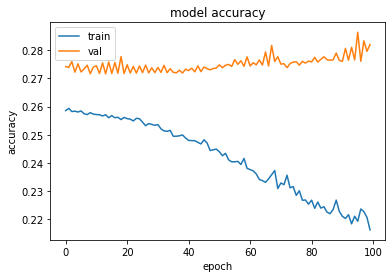

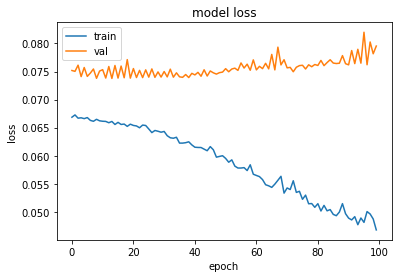

In [141]:
show_history(history)

In [147]:
x_test.shape

(1227, 6, 7)

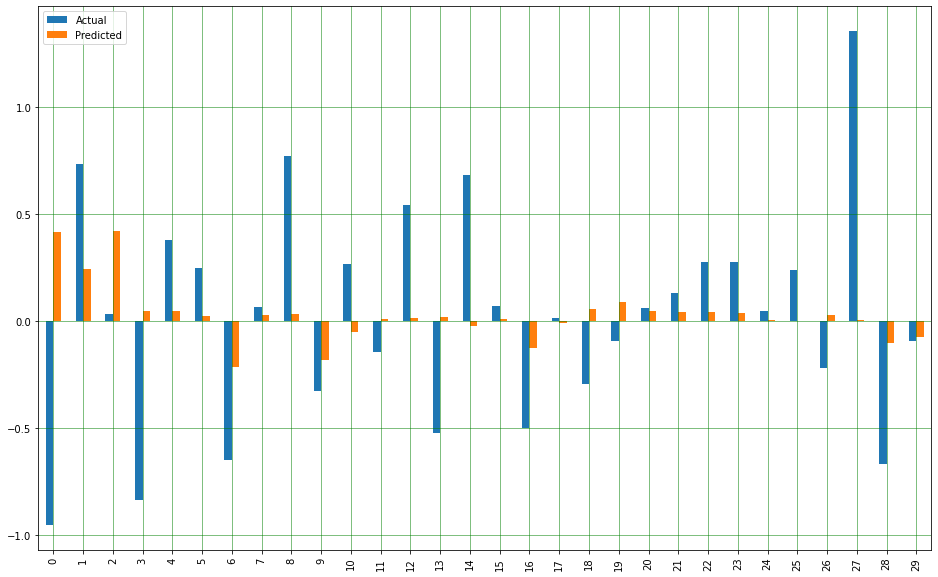

In [149]:
y_pred = model.predict(x_test)
result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

result1 = result.head(30)
result1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

clf = KerasRegressor(build_fn=build_model,verbose=0)

In [0]:

units_LSTM = []
units_Dense = []
rf_params = [ ((units_LSTM,units_Dense),(epochs,batch_size)) ]

grid_search = GridSearchCV(random_forest,rf_params, cv=5, return_train_score = True , scoring='neg_root_mean_squared_error',refit=True)

scores_rf = grid_search.fit(x_train,y_train.ravel())